## 1. Importing the dataset

### 1.1. Download from Kaggle

In [1]:
%pip install opendatasets

Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [3]:
import opendatasets as od
import pandas

In [5]:
# od.download("https://www.kaggle.com/datasets/omagarwal2411/nor-smart-speech")

100%|██████████| 2.27G/2.27G [00:23<00:00, 102MB/s] 


### 1.2. Load the dataset

In [4]:
import os
import IPython

In [5]:
os.listdir(path="/workspaces/aps360-winter2023/nor-smart-speech")

def getListOfFiles(dirName):
    listOfFiles = os.listdir(dirName)
    allFiles = list()
    for entry in listOfFiles:
        fullPath = os.path.join(dirName, entry)
        if os.path.isdir(fullPath):
            allFiles = allFiles + getListOfFiles(fullPath)
        else:
            allFiles.append(fullPath)
    return allFiles

In [6]:
dirName = './nor-smart-speech'
listOfFiles = getListOfFiles(dirName)
len(listOfFiles)

19487

In [7]:
print(listOfFiles[0])
IPython.display.Audio(listOfFiles[0])

./nor-smart-speech/happy/1017_MTI_HAP_XX.wav


## 2. Transforming audio into image

https://www.kaggle.com/code/timolee/audio-data-conversion-to-images-eda

In [10]:
from scipy import signal
import numpy as np

### 2.1. Log Spectrogram Function

In [11]:
def log_specgram(audio, sample_rate, window_size=20,
                 step_size=10, eps=1e-10):
    nperseg = int(round(window_size * sample_rate / 1e3))
    noverlap = int(round(step_size * sample_rate / 1e3))
    freqs, _, spec = signal.spectrogram(audio,
                                    fs=sample_rate,
                                    window='hann',
                                    nperseg=nperseg,
                                    noverlap=noverlap,
                                    detrend=False)
    return freqs, np.log(spec.T.astype(np.float32) + eps)

### 2.2. Convert and save image files

## 3. Visualizing the dataset

In [12]:
import matplotlib.pyplot as plt
from scipy.io import wavfile

In [17]:
def plotSamples(samples):
    fig = plt.figure(figsize=(10,10))

    # for each of the samples
    for i, filepath in enumerate(samples[:9]):
        # Make subplots
        plt.subplot(3,3,i+1)
        
        # pull the labels
        label = filepath.split('/')[-2]
        plt.title(label)
        
        # create spectogram
        samplerate, test_sound  = wavfile.read(filepath)
        _, spectrogram = log_specgram(test_sound, samplerate)
        
        plt.imshow(spectrogram.T, aspect='auto', origin='lower')
        plt.axis('off')

In [24]:
def plotWaveforms(samples):
    fig = plt.figure(figsize=(8,20))
    for i, filepath in enumerate(samples[:9]):
        plt.subplot(9,1,i+1)
        samplerate, test_sound  = wavfile.read(filepath)
        plt.title(filepath.split('/')[-2])
        plt.axis('off')
        plt.plot(test_sound)

### 3.1. Angry samples

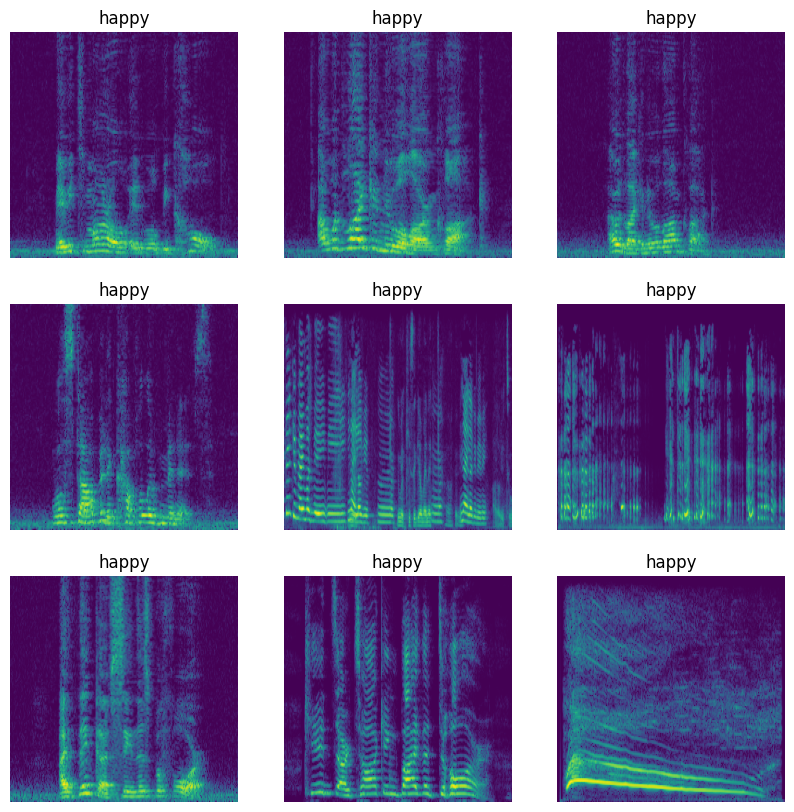

In [18]:
samples = ['./nor-smart-speech/happy/' + y for y in os.listdir('./nor-smart-speech/happy/')[:9]]
plotSamples(samples)

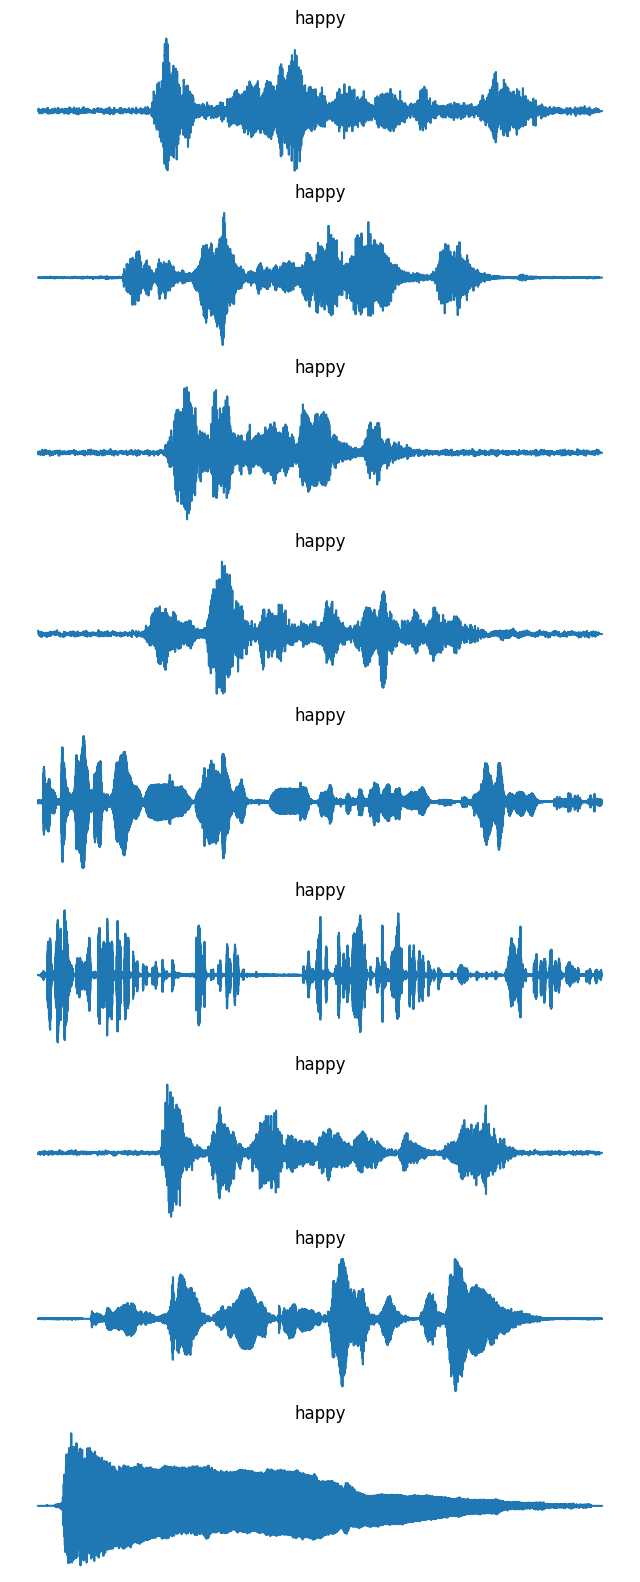

In [25]:
samples = ['./nor-smart-speech/happy/' + y for y in os.listdir('./nor-smart-speech/happy/')[:9]]
plotWaveforms(samples)

### 3.2. Disgust samples

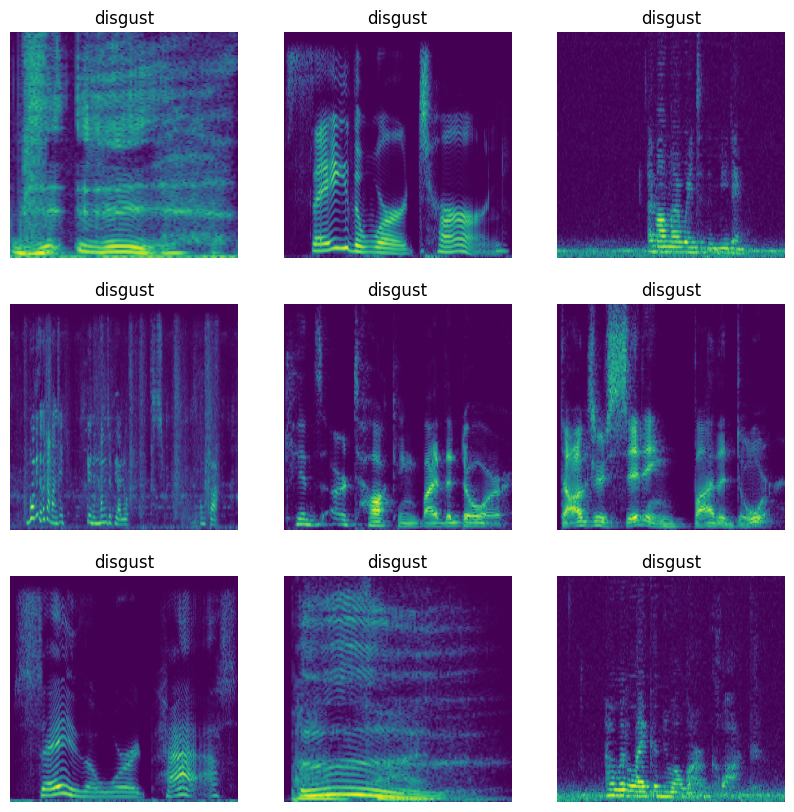

In [19]:
samples = ['./nor-smart-speech/disgust/' + y for y in os.listdir('./nor-smart-speech/disgust/')[:9]]
plotSamples(samples)